Conv3D example of MNIST Datatset with TensorFlow 

In [1]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv3D, MaxPooling3D
from tensorflow.keras.utils import to_categorical
import h5py
#h5py is for .h5 files
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
os.environ['KAGGLE_CONFICT_DIR']='/content'
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

### https://www.kaggle.com/daavoo/3d-mnist

In [4]:
! kaggle datasets download -d daavoo/3d-mnist

 86% 131M/153M [00:01<00:00, 102MB/s] 
100% 153M/153M [00:01<00:00, 98.0MB/s]


In [5]:
! unzip 3d-mnist.zip

Archive:  3d-mnist.zip
  inflating: full_dataset_vectors.h5  
  inflating: plot3D.py               
  inflating: test_point_clouds.h5    
  inflating: train_point_clouds.h5   
  inflating: voxelgrid.py            


Helper Functions:

In [7]:
# Convert 1D vector into 3D values, provided by the 3D MNIST
# array_to_color, it does is this: the imported data will be of one channel only.
# This function converts the data into RGB format, and hence into three channels. 
# This ensures resemblence with the original 2D scenario.
def array_to_color(array, cmap="Oranges"):
  s_m = plt.cm.ScalarMappable(cmap=cmap)
  return s_m.to_rgba(array)[:,:-1]
# now dataset is 3 channel
# Reshape data into format that can be handled by Conv3D layers.
def rgb_data_transform(data):
  data_t = []
  for i in range(data.shape[0]):
    data_t.append(array_to_color(data[i]).reshape(16, 16, 16, 3))
  return np.asarray(data_t, dtype=np.float32)

Data preparation:

In [8]:
# Load the HDF5 data file
with h5py.File("./full_dataset_vectors.h5", "r") as hf:    

    # Split the data into training/test features/targets
    X_train = hf["X_train"][:]
    targets_train = hf["y_train"][:]
    X_test = hf["X_test"][:] 
    targets_test = hf["y_test"][:]

    # Determine sample shape
    sample_shape = (16, 16, 16, 3)

    # Reshape data into 3D format
    X_train = rgb_data_transform(X_train)
    X_test = rgb_data_transform(X_test)

    # Convert target vectors to categorical targets
    targets_train = to_categorical(targets_train).astype(np.integer)
    targets_test = to_categorical(targets_test).astype(np.integer)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.


In [9]:
# Model configuration
batch_size = 100
no_epochs = 30
learning_rate = 0.001
no_classes = 10
validation_split = 0.2
verbosity = 1

In [10]:
# Create the model
model = Sequential()
model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=sample_shape))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(no_classes, activation='softmax'))

In [11]:
# Compile the model
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

# Fit data to model
history = model.fit(X_train, targets_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
80/80 [==============================] - 12s 17ms/step - loss: 2.2495 - accuracy: 0.2017 - val_loss: 1.9352 - val_accuracy: 0.3660
Epoch 2/30
80/80 [==============================] - 1s 14ms/step - loss: 1.7678 - accuracy: 0.4079 - val_loss: 1.5515 - val_accuracy: 0.4745
Epoch 3/30
80/80 [==============================] - 1s 14ms/step - loss: 1.4662 - accuracy: 0.5071 - val_loss: 1.3596 - val_accuracy: 0.5350
Epoch 4/30
80/80 [==============================] - 1s 14ms/step - loss: 1.2883 - accuracy: 0.5558 - val_loss: 1.2633 - val_accuracy: 0.5725
Epoch 5/30
80/80 [==============================] - 1s 13ms/step - loss: 1.1995 - accuracy: 0.5829 - val_loss: 1.2010 - val_accuracy: 0.5870
Epoch 6/30
80/80 [==============================] - 1s 14ms/step - loss: 1.1014 - accuracy: 0.6136 - val_loss: 1.1361 - val_accuracy: 0.6080
Epoch 7/30
80/80 [==============================] - 1s 13ms/step - loss: 1.0518 - accuracy: 0.6346 - val_loss: 1.1126 - val_accuracy: 0.6175
Epoch 8/30
8

Model Evaluation:

Test loss: 1.2993866205215454 / Test accuracy: 0.6710000038146973


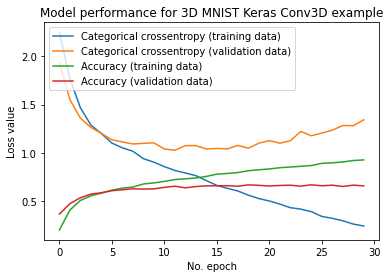

In [12]:
# Generate generalization metrics
score = model.evaluate(X_test, targets_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Plot history: Categorical crossentropy & Accuracy
plt.plot(history.history['loss'], label='Categorical crossentropy (training data)')
plt.plot(history.history['val_loss'], label='Categorical crossentropy (validation data)')
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Model performance for 3D MNIST Keras Conv3D example')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

ADD Droupout

In [13]:
from tensorflow.keras.layers import Dropout

In [31]:
# Create the model
model2 = Sequential()
model2.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform',padding='same', input_shape=sample_shape))
model2.add(MaxPooling3D(pool_size=(2, 2, 2)))
model2.add(Dropout(0.5))
model2.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform',padding='same'))
model2.add(MaxPooling3D(pool_size=(2, 2, 2)))
model2.add(Dropout(0.5))
model2.add(Conv3D(128, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform',padding='same'))
model2.add(MaxPooling3D(pool_size=(2, 2, 2)))
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(no_classes, activation='softmax'))

In [33]:
tensorflow.keras.backend.clear_session()
# Compile the model
model2.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

# Fit data to model
history = model2.fit(X_train, targets_train,
            batch_size=batch_size,
            epochs=50,
            verbose=verbosity,
            validation_split=validation_split)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
80/80 [==============================] - 4s 29ms/step - loss: 2.9982 - accuracy: 0.0993 - val_loss: 2.3017 - val_accuracy: 0.1185
Epoch 2/50
80/80 [==============================] - 2s 25ms/step - loss: 2.3041 - accuracy: 0.1074 - val_loss: 2.3015 - val_accuracy: 0.1050
Epoch 3/50
80/80 [==============================] - 2s 26ms/step - loss: 2.3026 - accuracy: 0.1021 - val_loss: 2.3010 - val_accuracy: 0.1050
Epoch 4/50
80/80 [==============================] - 2s 26ms/step - loss: 2.3023 - accuracy: 0.1056 - val_loss: 2.3008 - val_accuracy: 0.1190
Epoch 5/50
80/80 [==============================] - 2s 24ms/step - loss: 2.3018 - accuracy: 0.1066 - val_loss: 2.3007 - val_accuracy: 0.1190
Epoch 6/50
80/80 [==============================] - 2s 24ms/step - loss: 2.3012 - accuracy: 0.1077 - val_loss: 2.3002 - val_accuracy: 0.1190
Epoch 7/50
80/80 [==============================] - 2s 26ms/step - loss: 2.3008 - accuracy: 0.1096 - val_loss: 2.3003 - val_accuracy: 0.1050
Epoch 8/50
80

Test loss: 0.9572510123252869 / Test accuracy: 0.6759999990463257


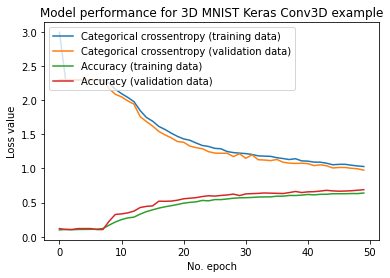

In [34]:
# Generate generalization metrics
score = model2.evaluate(X_test, targets_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Plot history: Categorical crossentropy & Accuracy
plt.plot(history.history['loss'], label='Categorical crossentropy (training data)')
plt.plot(history.history['val_loss'], label='Categorical crossentropy (validation data)')
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Model performance for 3D MNIST Keras Conv3D example')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()